# Calculate the Efficient Frontier of a group of portfolios composed of 2 assets

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline #for plotting graphs just below code cells and storing them in the notebook document

In [3]:
assets = ['PG','^GSPC']
pf_data = pd.DataFrame()
for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2010-1-1')['Adj Close']

In [4]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,43.778294,1132.989990
2010-01-05,43.792633,1136.520020
2010-01-06,43.584908,1137.140015
2010-01-07,43.348553,1141.689941
2010-01-08,43.291252,1144.979980


# Normalize to 100

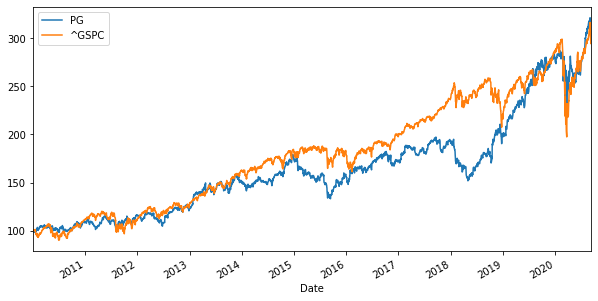

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

# Log returns

In [6]:
log_returns = np.log(pf_data/pf_data.shift(1))

# Average

In [9]:
log_returns.mean() * 250 #they have high rates of return

PG       0.105823
^GSPC    0.100452
dtype: float64

# Covariance

In [10]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029394,0.017964
^GSPC,0.017964,0.030680


# Correlation Matrix

In [11]:
log_returns.corr() # they are highly correlated 

,PG,^GSPC
PG,1.000000,0.598208
^GSPC,0.598208,1.000000


# Portfolio optimization froma technical perspective 

In [12]:
num_assets = len(assets)

Create 2 random weights

In [13]:
arr = np.random.random(2)
arr

array([0.75072672, 0.86971082])

Calculate the sum of the weights to see if they add to 1

In [14]:
arr[0] + arr[1]

1.6204375451141724

Create another array of weights whose sum equals 1

In [15]:
weights = np.random.random(num_assets)
weights = weights / np.sum(weights)
weights

array([0.08007462, 0.91992538])

# Expected Portfolio Return

In [16]:
np.sum(weights * log_returns.mean()) * 250

0.10088243591457785

# Expected Portfolio Variance

In [17]:
np.dot(weights.T, np.dot(log_returns.cov()*250, weights))

0.0287980075369005

# Expected Portfolio Volatility

In [18]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))

0.16969975703253232

# Constructing the portfolio returns and portfolio volatities 

We are not considering 1000 different investments containing different stocks!
we are considering 1000 different combinations of the same 2 assets (1% PG and 99% GSPC; 99% PG and 1% GSPC etc)
Compare them and see which combination is efficient

In [21]:
portf_returns = []
portf_volatilities = []
#create a loop that will be repeated 1000 times
for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    portf_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))
portf_returns, portf_volatilities

([0.10210047573670265,
  0.10287289615805148,
  0.10482324527810657,
  0.10331300049150648,
  0.10461801889827911,
  0.10253570859331022,
  0.10418064388078083,
  0.10365777641018867,
  0.10062527943231998,
  0.10278461778708253,
  0.103231129369841,
  0.10376116259061059,
  0.10319042432448619,
  0.10548541429444747,
  0.10333799672869491,
  0.1046985585448006,
  0.10069527096220499,
  0.10341097433362748,
  0.1015955832904648,
  0.10367437714407224,
  0.10310954794350799,
  0.10378379652774988,
  0.10212252295422293,
  0.10461837704392492,
  0.10271604612007798,
  0.1050453251070211,
  0.1055117854300282,
  0.10371494206099709,
  0.10330079682661347,
  0.10372073118728938,
  0.10435325118607368,
  0.10114247736406994,
  0.10385023272168609,
  0.10306832072946882,
  0.1030036878556095,
  0.10476877932198168,
  0.10396580963954692,
  0.10119450097241986,
  0.10288190280835545,
  0.10380386818520244,
  0.10307779333400292,
  0.10161400677641869,
  0.10382633254972978,
  0.10184965682311

the 2 lists above must be transformed into numpy arrays

In [22]:
portf_returns = np.array(portf_returns)
portf_volatilities = np.array(portf_volatilities)

In [25]:
portf_returns, portf_volatilities

(array([0.10210048, 0.1028729 , 0.10482325, 0.103313  , 0.10461802,
        0.10253571, 0.10418064, 0.10365778, 0.10062528, 0.10278462,
        0.10323113, 0.10376116, 0.10319042, 0.10548541, 0.103338  ,
        0.10469856, 0.10069527, 0.10341097, 0.10159558, 0.10367438,
        0.10310955, 0.1037838 , 0.10212252, 0.10461838, 0.10271605,
        0.10504533, 0.10551179, 0.10371494, 0.1033008 , 0.10372073,
        0.10435325, 0.10114248, 0.10385023, 0.10306832, 0.10300369,
        0.10476878, 0.10396581, 0.1011945 , 0.1028819 , 0.10380387,
        0.10307779, 0.10161401, 0.10382633, 0.10184966, 0.10392188,
        0.10525647, 0.10083643, 0.10402804, 0.10191316, 0.10218308,
        0.10322172, 0.10233905, 0.10173812, 0.1019754 , 0.10208683,
        0.10482415, 0.10521023, 0.10169192, 0.10188569, 0.10110769,
        0.10222076, 0.10315082, 0.10275467, 0.10338389, 0.10344333,
        0.10382909, 0.10429509, 0.10426768, 0.10218653, 0.10116062,
        0.1049732 , 0.10379763, 0.10181276, 0.10

# Plotting

Create a dataframe object containing 2 columns: Return and Volatility

In [26]:
portfolios = pd.DataFrame({'Return':portf_returns, 'Volatility':portf_volatilities})

In [28]:
portfolios.head()

,Return,Volatility
0,0.102100,0.158585
1,0.102873,0.155314
2,0.104823,0.161172
3,0.103313,0.154869
4,0.104618,0.159629


Text(0, 0.5, 'Expected Return')

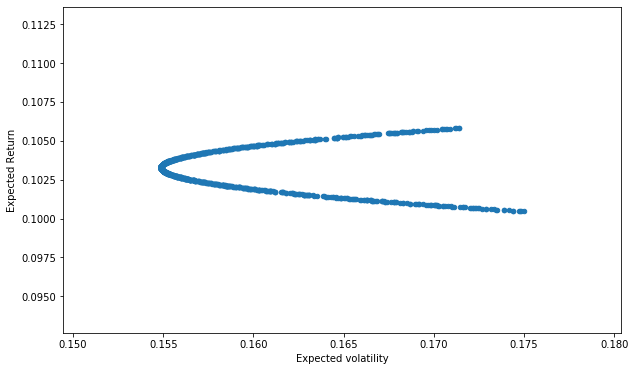

In [29]:
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(10,6))
plt.xlabel('Expected volatility')
plt.ylabel('Expected Return')